## 7. Transforming Variables in the Bike Sharing Dataset
### <b>Task:</b> Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
# Loading the dataset
bike_dataset = pd.read_csv('Datasets\\BikeSharing.csv')
bike_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# Checking for the missing values
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

-> So, there are no missing values in the dataset. We can now proceed to transforming the skewed variables.

In [4]:
# Printing basic statistics of dataset
bike_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Printing info of dataset
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Identify skewed variables
bike_dataset.drop(['instant', 'dteday'], axis=1, inplace=True)  # Since instant is not needed and dteday is non-numerical feature.
skewed_columns = bike_dataset.skew().sort_values(ascending=False) 
print("Skewed Columns:\n", skewed_columns)

Skewed Columns:
 holiday       5.638538
casual        2.499237
registered    1.557904
cnt           1.277412
weathersit    1.228047
windspeed     0.574905
weekday      -0.002998
season       -0.005416
temp         -0.006021
mnth         -0.009253
yr           -0.010243
hr           -0.010680
atemp        -0.090429
hum          -0.111287
workingday   -0.785258
dtype: float64


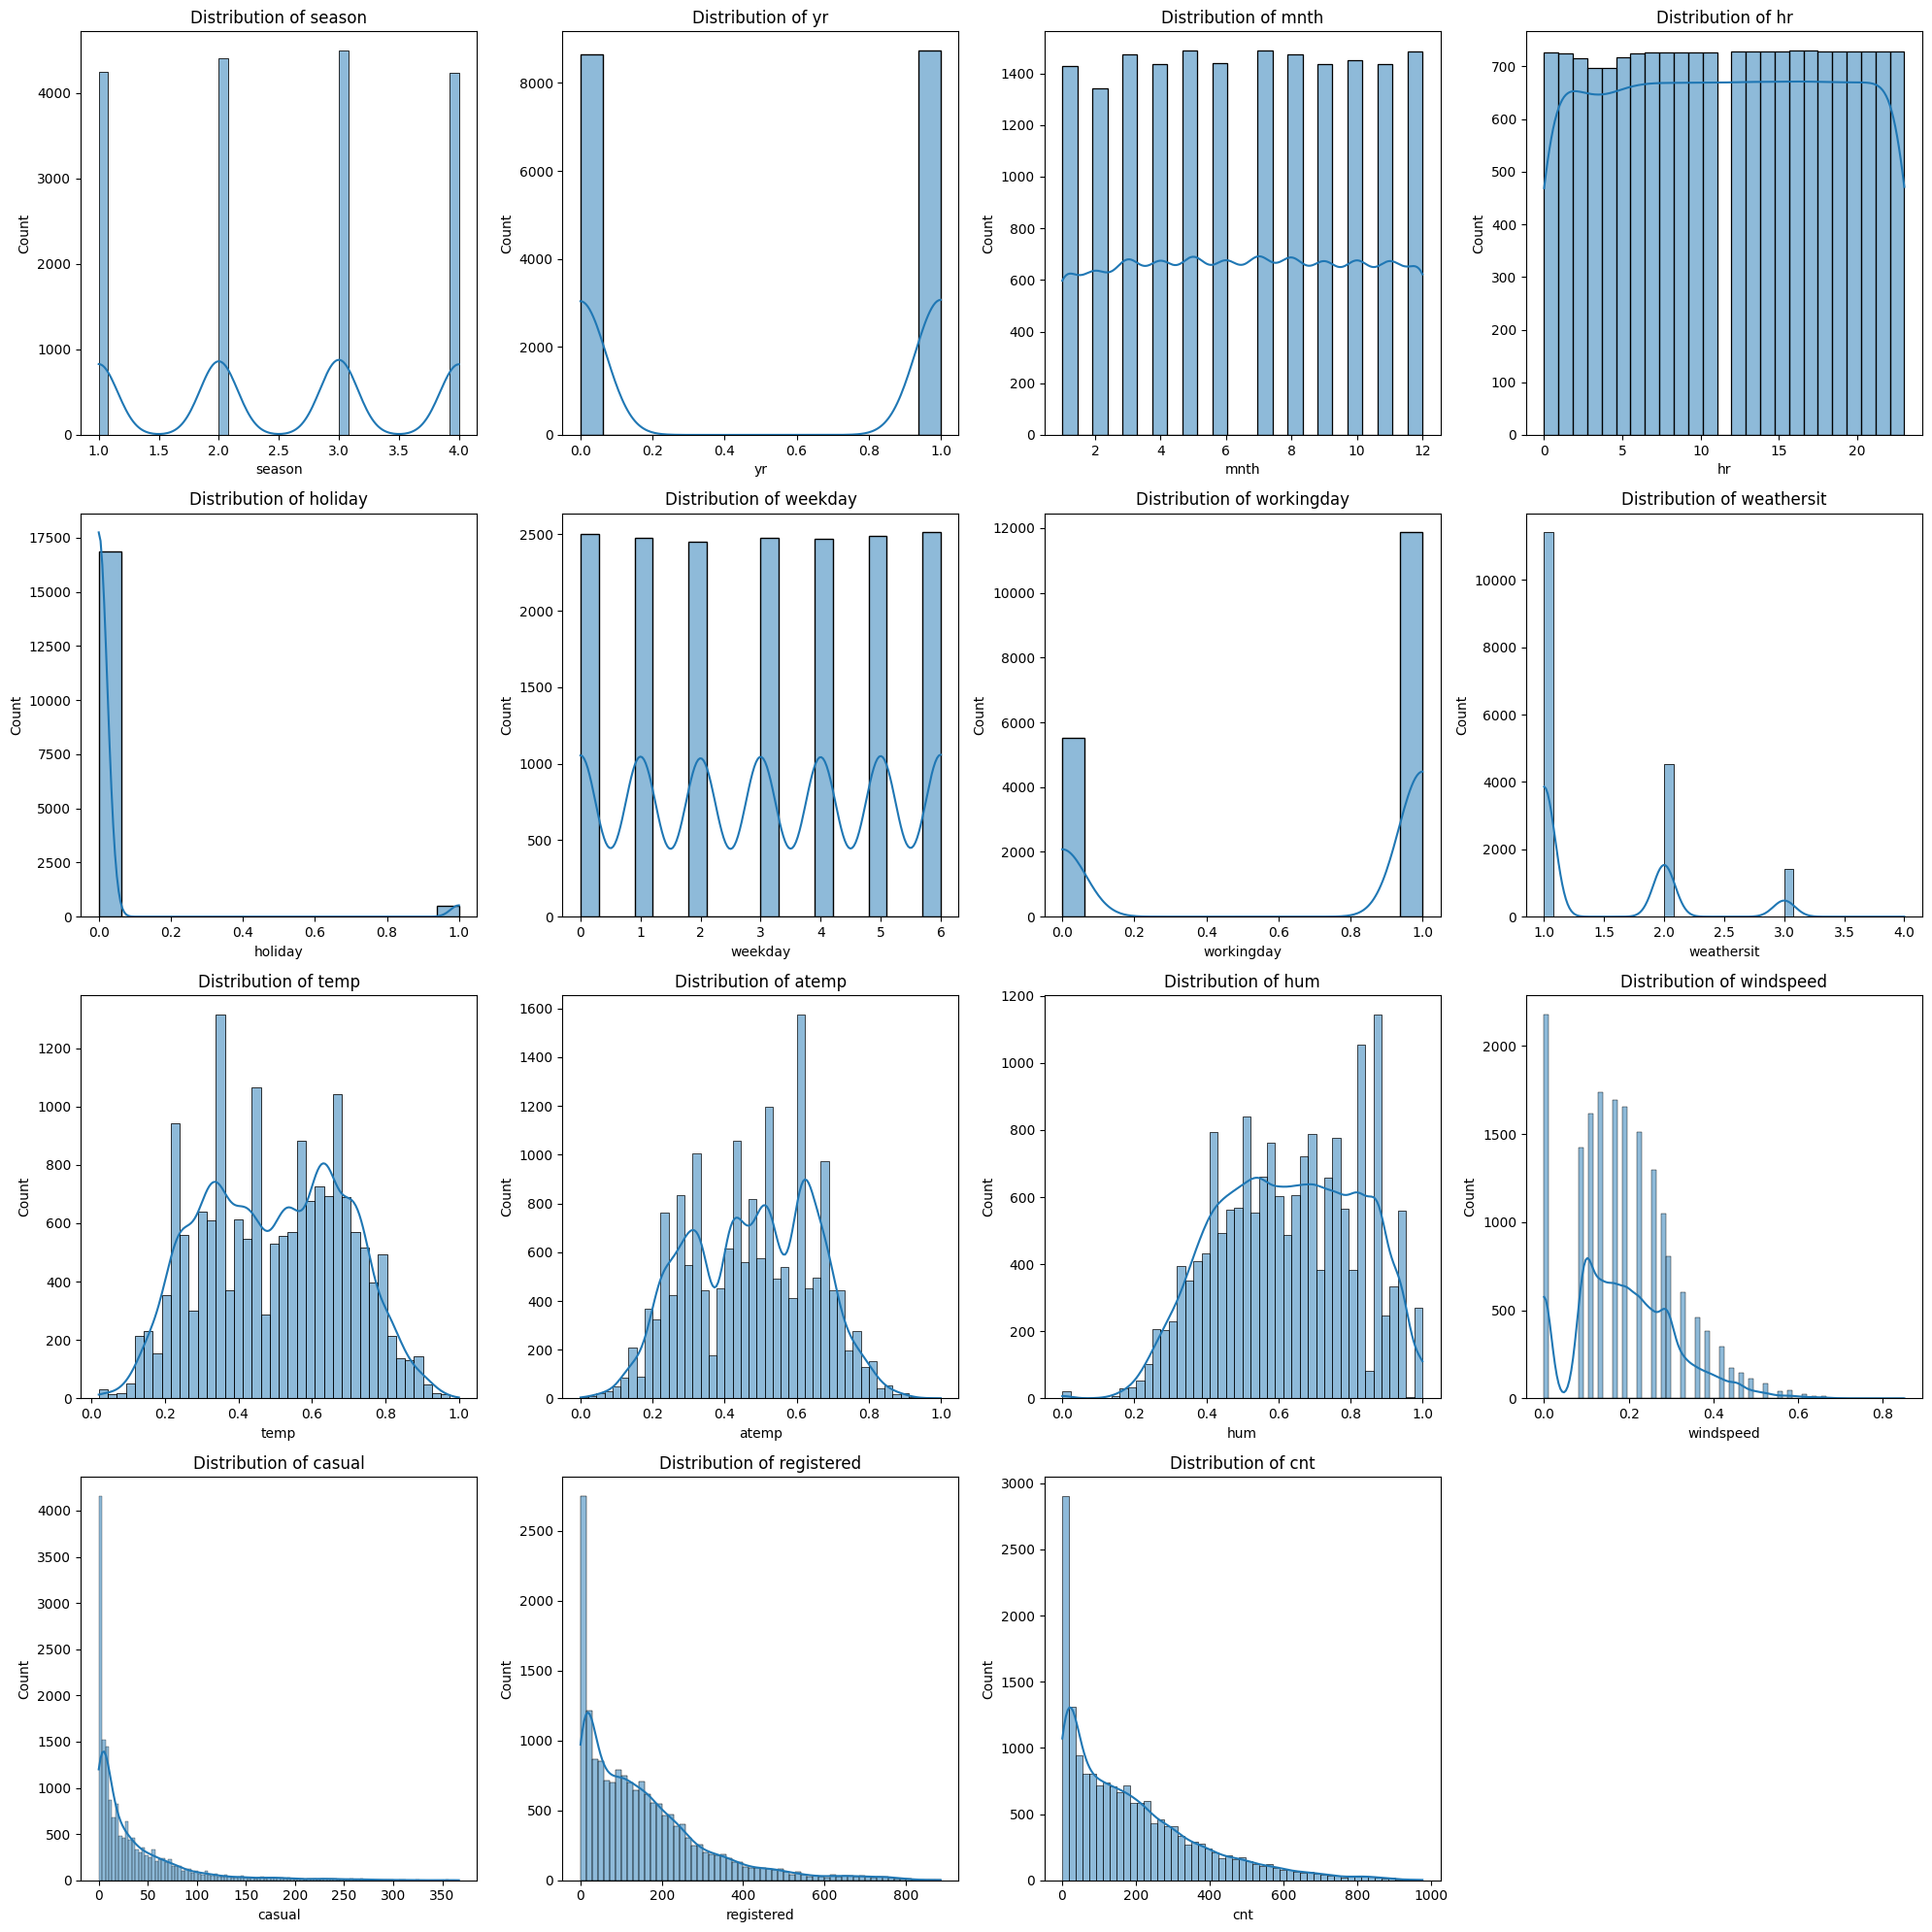

In [7]:
# Plotting the dist plot to visualize the distribution of features
# Create a figure and a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(bike_dataset.columns):
    sns.histplot(bike_dataset[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> Since as can be seen by both the data and the distribution plots:
<li><b>Positively (Right) Skewed</b><br>
        - holiday: 5.638538 (extremely positively skewed)<br>
        - casual: 2.499237 (highly positively skewed) <br>
        - registered: 1.557904 (moderately positively skewed)<br>
        - cnt: 1.277412 (moderately positively skewed)<br>
        - weathersit: 1.228047 (moderately positively skewed)<br>
        - windspeed: 0.574905 (slightly positively skewed)<br></li>
<br>
        
<li><b>Approximately Normally Distributed</b><br>
        - weekday: -0.002998<br>
        - season: -0.005416<br>
        - temp: -0.006021<br>
        - mnth: -0.009253<br>
        - yr: -0.010243<br>
        - hr: -0.010680<br>
        - atemp: -0.090429<br>
        - hum: -0.111287<br></li>
<br>

<li><b>Negatively (Left) Skewed</b><br>
        - workingday: -0.785258<br></li>

In [8]:
# Making a separate dataframe for skewed features
skewed_features = bike_dataset[skewed_columns.index]
skewed_features = skewed_features.drop(['weekday', 'season', 'temp', 'mnth', 'yr', 'hr', 'atemp', 'hum'], axis=1)
skewed_features

,holiday,casual,registered,cnt,weathersit,windspeed,workingday
0,0,3,13,16,1,0.0000,0
1,0,8,32,40,1,0.0000,0
2,0,5,27,32,1,0.0000,0
3,0,3,10,13,1,0.0000,0
4,0,0,1,1,1,0.0000,0
...,...,...,...,...,...,...,...
17374,0,11,108,119,2,0.1642,1
17375,0,8,81,89,2,0.1642,1
17376,0,7,83,90,1,0.1642,1
17377,0,13,48,61,1,0.1343,1


<h2><li>Log Transformation (Efficient on Positively Skewed Data)</li></h2>

In [9]:
# Creating a new log transformed dataframe
log_transformed_features = skewed_features.copy()

# Apply log transformation to each feature
for feature in log_transformed_features.columns:
    log_transformed_features[feature] = np.log1p(log_transformed_features[feature])

log_transformed_features.head()

,holiday,casual,registered,cnt,weathersit,windspeed,workingday
0,0.0,1.386294,2.639057,2.833213,0.693147,0.0,0.0
1,0.0,2.197225,3.496508,3.713572,0.693147,0.0,0.0
2,0.0,1.791759,3.332205,3.496508,0.693147,0.0,0.0
3,0.0,1.386294,2.397895,2.639057,0.693147,0.0,0.0
4,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.0


In [10]:
# Analyzing the skewness of log transformed features
log_transformed_features.skew().sort_values(ascending=False) 

holiday       5.638538
weathersit    0.996837
windspeed     0.263926
casual       -0.230087
workingday   -0.785258
cnt          -0.818180
registered   -0.819644
dtype: float64

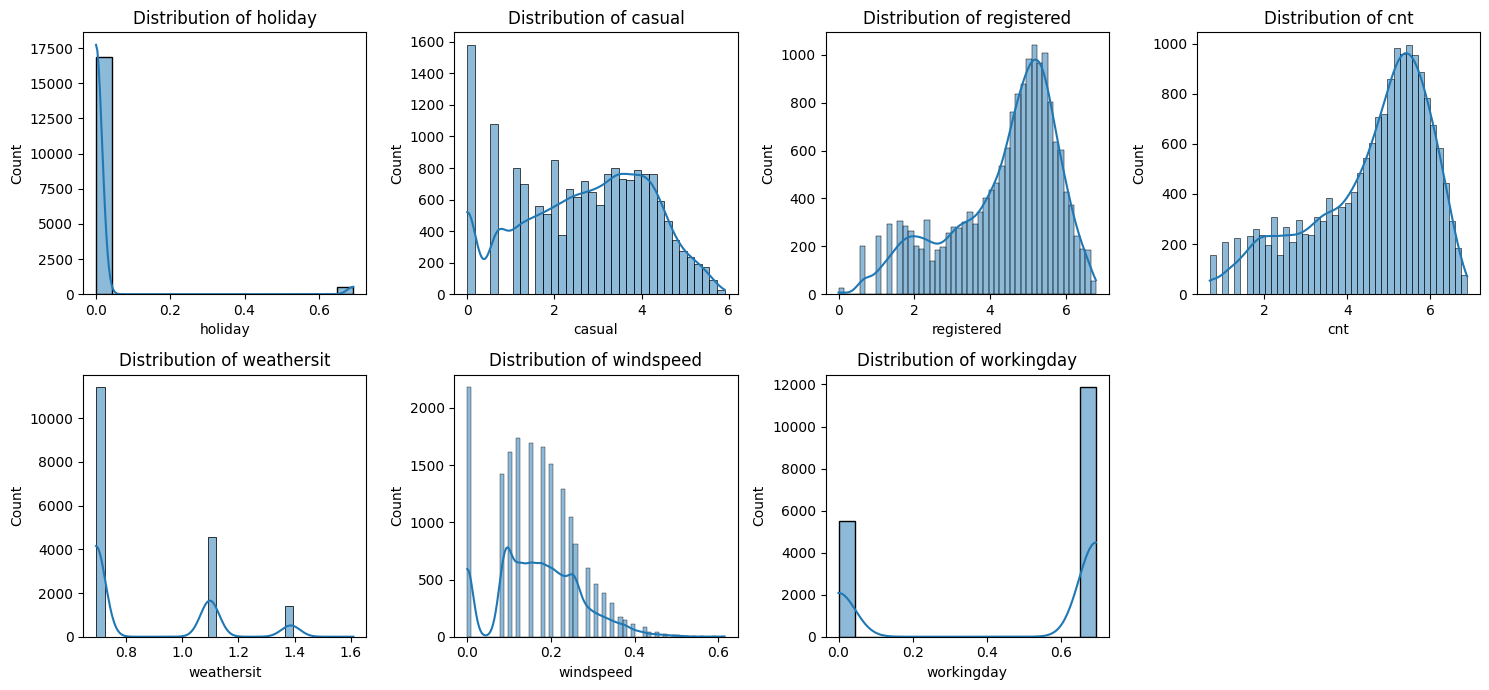

In [11]:
# Plotting the dist plot to visualize the distribution of features after log transformation
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(log_transformed_features.columns):
    sns.histplot(log_transformed_features[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> So other than the holiday feature (since it is very much imbalanced), the other features are converted from skewed to normally distributed or at least normally distributed data due to log transform.

<h2><li>Square Root Transformation</li></h2>

In [12]:
# Creating a new sqrt transformed dataframe
sqrt_transformed_features = skewed_features.copy()

# Apply log transformation to each feature
for feature in sqrt_transformed_features.columns:
    sqrt_transformed_features[feature] = np.sqrt(sqrt_transformed_features[feature])

sqrt_transformed_features.head()

,holiday,casual,registered,cnt,weathersit,windspeed,workingday
0,0.0,1.732051,3.605551,4.000000,1.0,0.0,0.0
1,0.0,2.828427,5.656854,6.324555,1.0,0.0,0.0
2,0.0,2.236068,5.196152,5.656854,1.0,0.0,0.0
3,0.0,1.732051,3.162278,3.605551,1.0,0.0,0.0
4,0.0,0.000000,1.000000,1.000000,1.0,0.0,0.0


In [13]:
# Analyzing the skewness of sqrt transformed features
sqrt_transformed_features.skew().sort_values(ascending=False) 

holiday       5.638538
weathersit    1.041863
casual        0.911489
registered    0.371268
cnt           0.286475
workingday   -0.785258
windspeed    -0.889932
dtype: float64

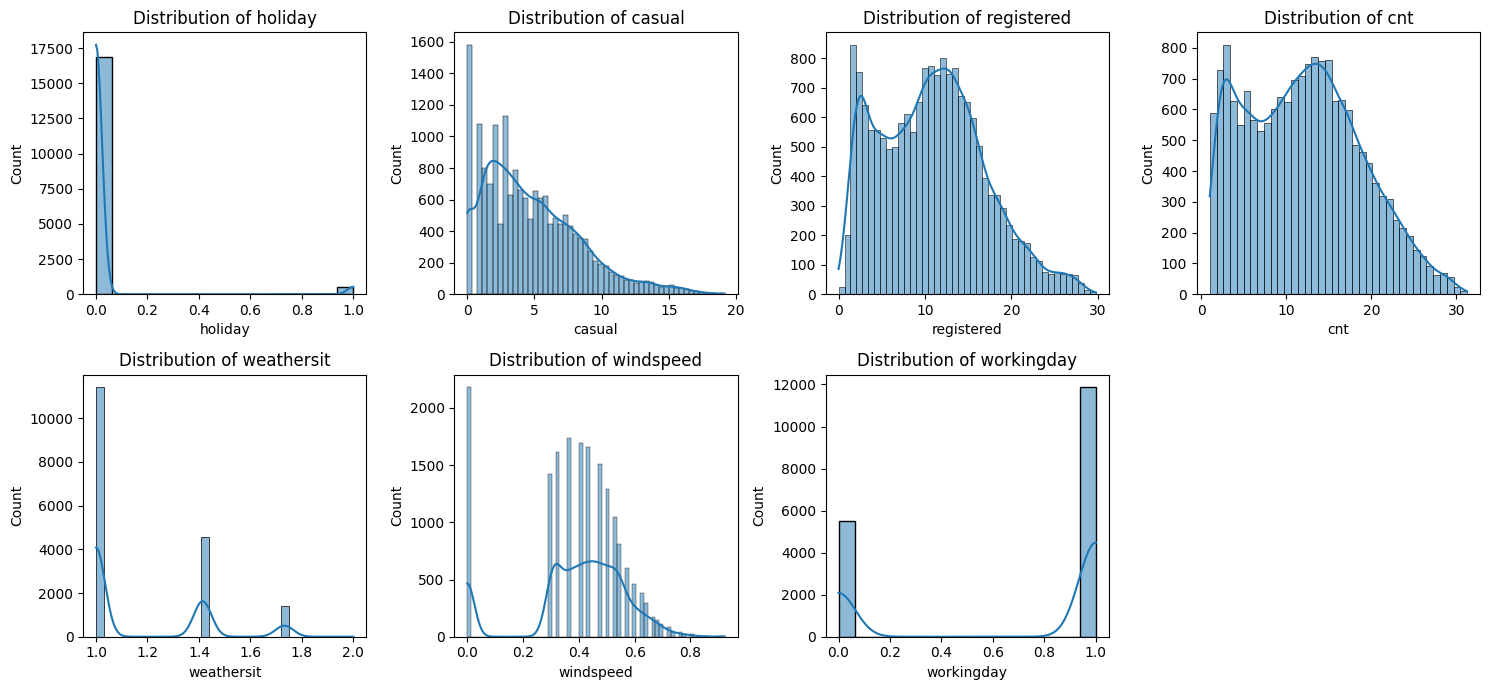

In [14]:
# Plotting the dist plot to visualize the distribution of features after sqrt transformation
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(sqrt_transformed_features.columns):
    sns.histplot(sqrt_transformed_features[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> So in square root transform, the features does not become well normally distributed (only 'registered' and 'cnt' are close to normal distribution) as compared to the log transformation. So, square root transformation is not suitable in this scenario.

<h2><li>Box-Cox Transformation</li></h2>

In [15]:
# Initiating the power transformer and selecting method as box-cox
boxcox_transformer = PowerTransformer(method='box-cox')

# Creating a new box-cox transformed dataframe
boxcox_transformed_features = skewed_features.copy()
boxcox_lambdas = {}

# Applying box-cox transformation to each feature
for feature in boxcox_transformed_features.columns:
    boxcox_transformed_features[feature] = boxcox_transformer.fit_transform(sqrt_transformed_features[[feature]] + 0.00000001)

    # Collect the lambda for each feature
    boxcox_lambdas[feature] = boxcox_transformer.lambdas_[0]

# We have added 0.00000001 to each value of each feature since we have zero values in the dataset. This will make the dataset non-zero and will not have too much impact on dataset.
# This enables that box-cox transform can be applied to this dataset.

pd.DataFrame({
    'cols': list(boxcox_lambdas.keys()),
    'boxcox_lambdas': list(boxcox_lambdas.values())
})

,cols,boxcox_lambdas
0,holiday,-1.886901
1,casual,0.327639
2,registered,0.575141
3,cnt,0.610862
4,weathersit,-5.089259
5,windspeed,0.413423
6,workingday,0.129964


-> So, these are the lambda values using which each feature of the dataset is transformed.

In [16]:
boxcox_transformed_features.head()

,holiday,casual,registered,cnt,weathersit,windspeed,workingday
0,-0.172112,-0.495756,-1.247866,-1.242780,-0.721345,-2.54274,-1.4669
1,-0.172112,-0.141199,-0.785512,-0.783245,-0.721345,-2.54274,-1.4669
2,-0.172112,-0.318212,-0.882120,-0.907270,-0.721345,-2.54274,-1.4669
3,-0.172112,-0.495756,-1.361502,-1.330219,-0.721345,-2.54274,-1.4669
4,-0.172112,-2.525774,-2.063698,-2.055600,-0.721345,-2.54274,-1.4669


In [17]:
# Analyzing the skewness of sqrt transformed features
boxcox_transformed_features.skew().sort_values(ascending=False) 

holiday       5.638538
weathersit    0.675275
cnt          -0.147928
registered   -0.175324
workingday   -0.785258
casual       -1.152203
windspeed    -1.935979
dtype: float64

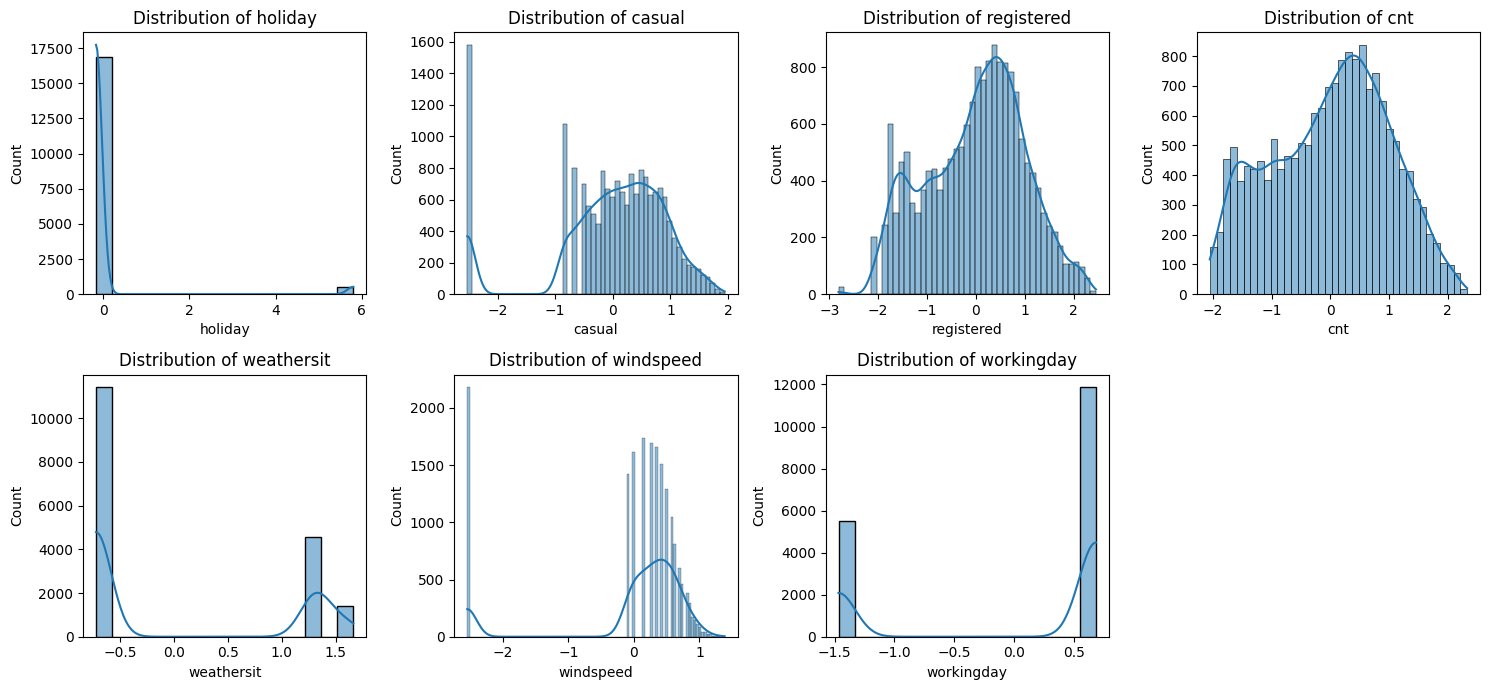

In [18]:
# Plotting the dist plot to visualize the distribution of features after boxcox transformation
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(boxcox_transformed_features.columns):
    sns.histplot(boxcox_transformed_features[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> So in box-cox transform, the features do become normally distributed somehow but not good results ('casual', 'windspeed' and 'workingday' got away from normal distributions). So, boxcox transform is not giving best results in this case.

-> <b><u>Yeo-Johnson</u></b> transformation provides good results with data more normally distributed. Just change the method in PowerTransform constructor from 'box-cox' to 'yeo-johnson'. Here's the sneak peak of values of skewness obtained in case of yeo-johnson:<br>
<pre>
    holiday       5.638538<br>
    weathersit    0.678128<br>
    windspeed    -0.034356<br>
    casual       -0.049123<br>
    registered   -0.100055<br>
    cnt          -0.119922<br>
    workingday   -0.785258<br>
    dtype: float64<br></pre>

-> As we can see, yeo-johnson provide much better results than box-cox transform.


<hr>